In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use("fivethirtyeight")

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', 
                 parse_dates=['Date'])

In [2]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [3]:
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [5]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
161563,2022-04-12,Zimbabwe,247094,0,5460,252554
161564,2022-04-13,Zimbabwe,247160,0,5460,252620
161565,2022-04-14,Zimbabwe,247208,0,5462,252670
161566,2022-04-15,Zimbabwe,247237,0,5462,252699
161567,2022-04-16,Zimbabwe,247237,0,5462,252699


In [7]:
df.shape

(161568, 6)

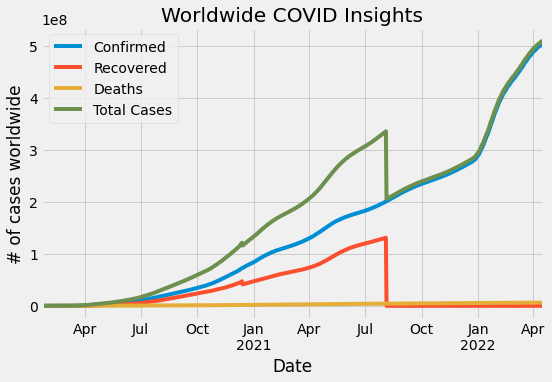

In [13]:
# Worldwide Cases

world_wide_df = df.groupby(["Date"]).sum()
w = world_wide_df.plot(figsize=(8,5))
w.set_xlabel("Date")
w.set_ylabel("# of cases worldwide")
w.title.set_text("Worldwide COVID Insights")

plt.show()

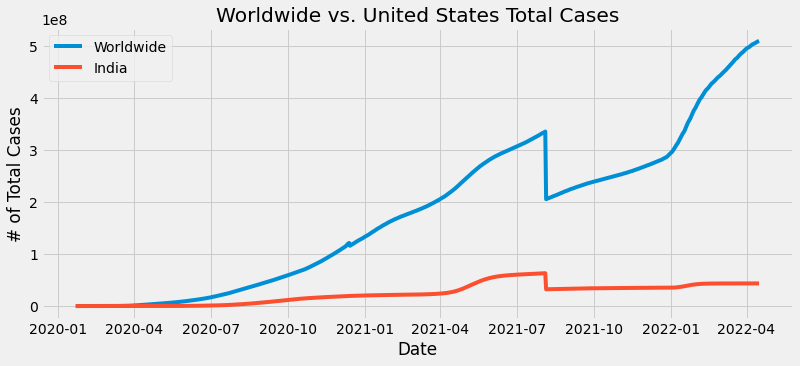

In [29]:
# India covid insights
India_df = df[df["Country"] == "India"].groupby(["Date"]).sum()
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(world_wide_df[["Total Cases"]], label="Worldwide")
ax.plot(India_df["Total Cases"], label = "India")

ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Worldwide vs. United States Total Cases')

plt.legend(loc='upper left')
plt.show()

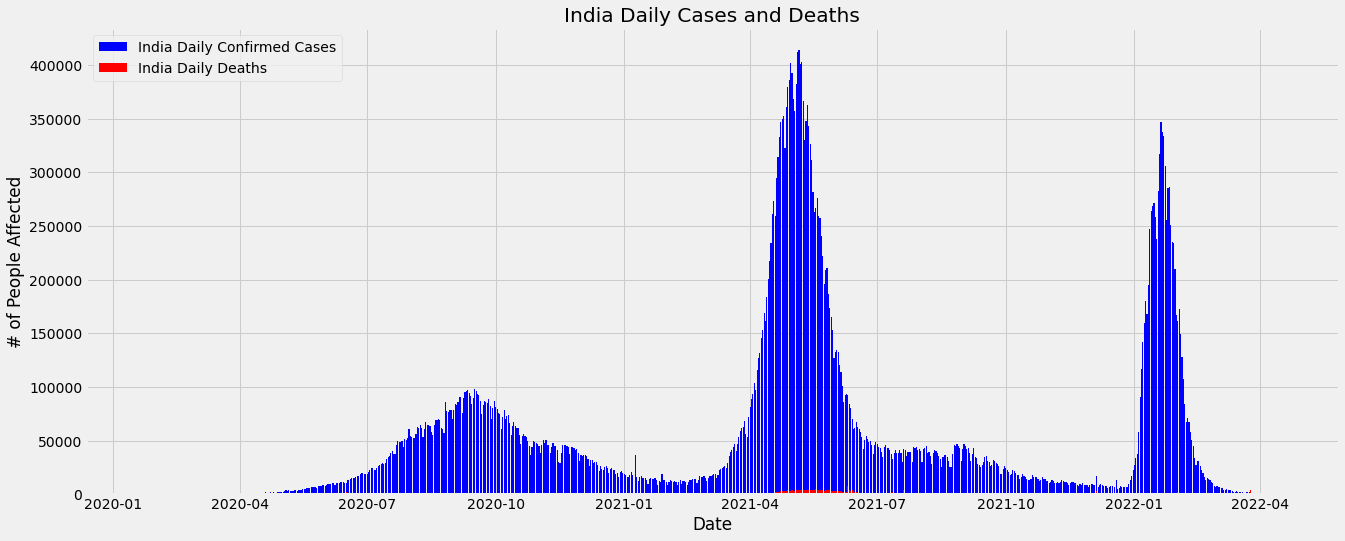

In [35]:
# India Daily Cases and Deaths
# If you run the code from the previous cell, since we groupby we need to reset_index ot access the Date Column


India_df = India_df.reset_index()
India_df['Daily Confirmed'] = India_df['Confirmed'].sub(India_df['Confirmed'].shift())
India_df['Daily Deaths'] = India_df['Deaths'].sub(India_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(India_df['Date'], India_df['Daily Confirmed'], color='b', label='India Daily Confirmed Cases')
ax.bar(India_df['Date'], India_df['Daily Deaths'], color='r', label='India Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('India Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

C:\Users\Visha\AppData\Local\Temp/ipykernel_29816/274412048.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
C:\Users\Visha\AppData\Local\Temp/ipykernel_29816/274412048.py:13: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')


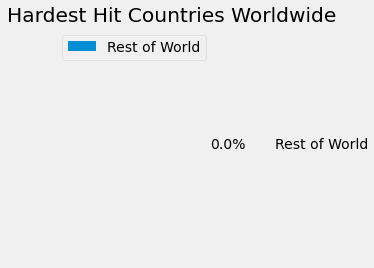

In [37]:

from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')
ax.title.set_text('Hardest Hit Countries Worldwide')

plt.legend(loc='upper left')
plt.show()